In [2]:
import os
import re
import math
import random
import numpy as np
from scipy.stats import norm
from scipy.stats import ranksums
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42 # Output editable PDF text
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #last_expr

In [3]:
preds = pd.read_csv('20220610_Results/6. Pred_result.csv', index_col=0)
import cloudpickle as pickle
[data, gene_exp, module_exp, pathway_exp, mir2gene_w, gene2module_w,
 module2pathway_w, pathway2out_w] = pickle.load( open('20220610_Results/8. Exp_and_Weight_df_all.pkl', 'rb'))

In [4]:
preds['Label'] = data.loc[preds.index, 'Label']

In [5]:
preds.head(2)

,Pred,Prob,Label
GSM1878567,0.0,0.000298,non-cancer
GSM1877697,0.0,0.000370,non-cancer


In [6]:
preds.groupby('Label').size()

Label
Breast Cancer             512
benign breast disease      17
non-cancer               1075
prostate disease           42
dtype: int64

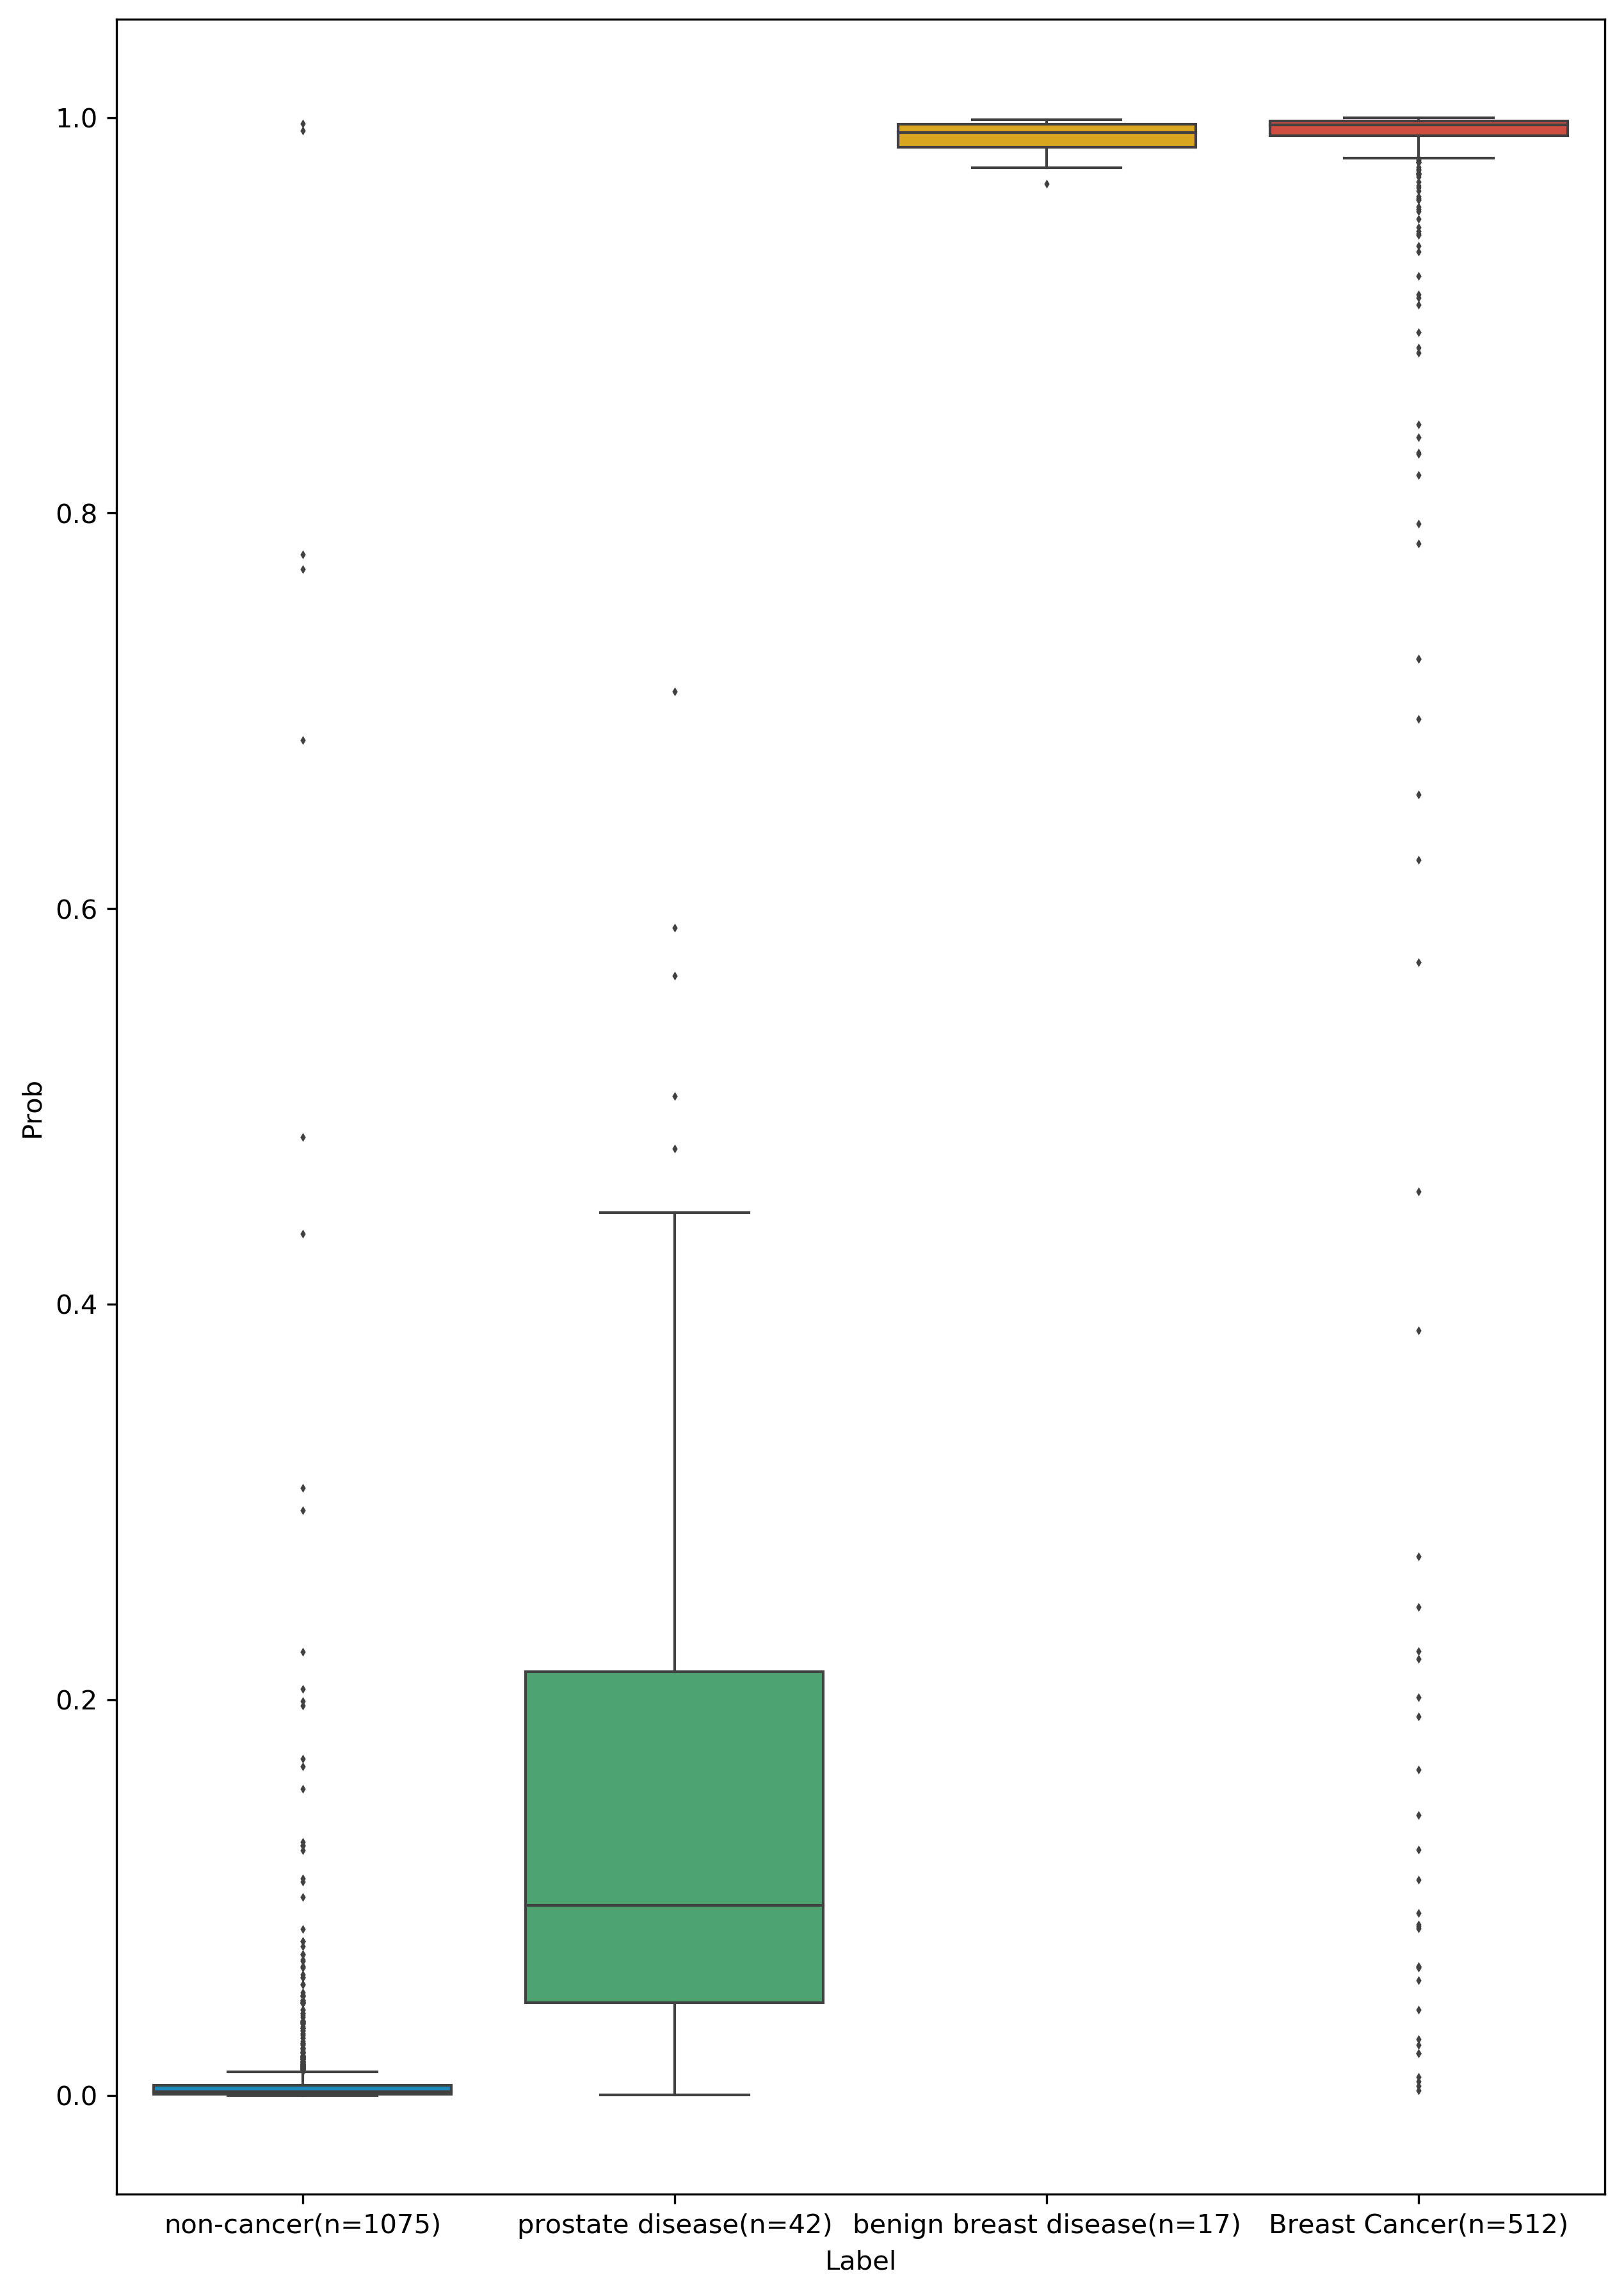

In [6]:
fig = plt.figure(1, (10, 15), dpi=300)
_ = sns.boxplot(x='Label', y='Prob', data=preds, 
                order=['non-cancer', 'prostate disease', 'benign breast disease', 'Breast Cancer'], 
                palette=['#0095d9', '#3eb370', '#f8b500', '#e83929'], linewidth=1, fliersize=1)
_ = plt.xticks([0, 1, 2, 3], ['non-cancer(n=1075)', 'prostate disease(n=42)', 
                              'benign breast disease(n=17)', 'Breast Cancer(n=512)'])
fig.savefig('20220610_Results/9. predictDifferentDiseasesAbility.pdf', dpi=300)

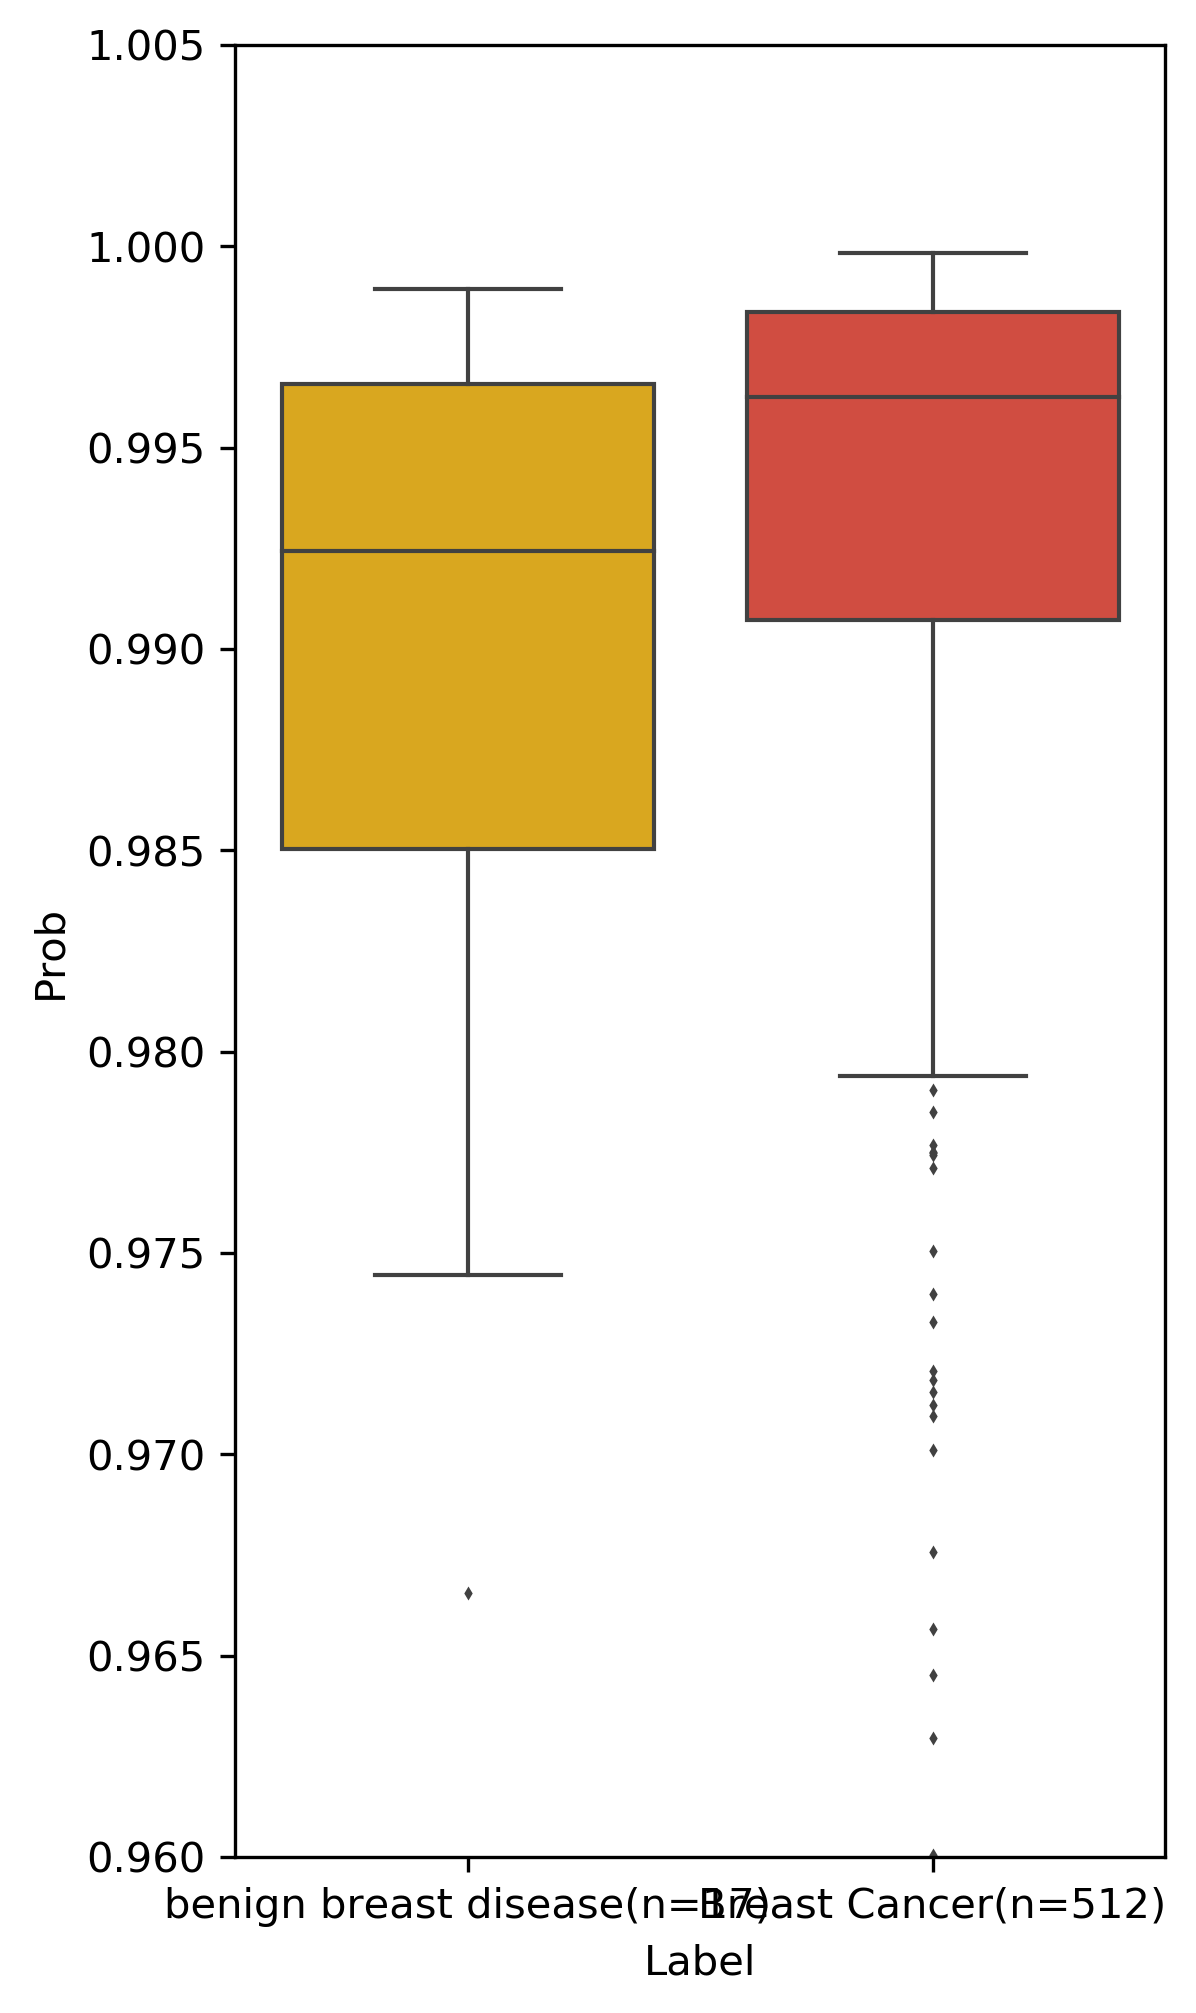

In [18]:
fig = plt.figure(1, (4, 8), dpi=300)
_ = sns.boxplot(x='Label', y='Prob', data=preds, 
                order=['non-cancer', 'prostate disease', 'benign breast disease', 'Breast Cancer'], 
                palette=['#0095d9', '#3eb370', '#f8b500', '#e83929'], linewidth=1, fliersize=1)
_ = plt.xticks([0, 1, 2, 3], ['non-cancer(n=1075)', 'prostate disease(n=42)', 
                              'benign breast disease(n=17)', 'Breast Cancer(n=512)'])
_ = plt.ylim([0.96, 1.005])
_ = plt.xlim([1.5, 3.5])

In [7]:
from scipy.stats import f_oneway
stat, p_value = f_oneway(*[preds.loc[preds['Label']==g, 'Prob'] for g in set(preds['Label'])])
p_value

0.0

In [12]:
ds = list(set(preds['Label']))
for i in range(len(ds)-1):
    for j in range(i+1, len(ds)):
        prob1 = preds.loc[preds['Label']==ds[i], 'Prob']
        prob2 = preds.loc[preds['Label']==ds[j], 'Prob']
        ds[i], ds[j], ranksums(prob1, prob2)[1]

('benign breast disease', 'non-cancer', 1.6385394744481858e-12)

('benign breast disease', 'Breast Cancer', 0.039901472606863456)

('benign breast disease', 'prostate disease', 2.3016401266036563e-09)

('non-cancer', 'Breast Cancer', 2.6662397111239603e-224)

('non-cancer', 'prostate disease', 2.6763895639303e-23)

('Breast Cancer', 'prostate disease', 8.266045051860328e-24)

In [8]:
import cloudpickle as pickle
[data, gene_exp, module_exp, pathway_exp, mir2gene_w, gene2module_w,
 module2pathway_w, pathway2out_w] = pickle.load( open('20220610_Results/8. Exp_and_Weight_df_test.pkl', 'rb'))

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pathway_pca = pd.DataFrame(pca.fit_transform(pathway_exp), index=pathway_exp.index, columns=['PC1', 'PC2'])
pca.explained_variance_ratio_
pathway_pca.head(2)
pathway_pca['Label'] = preds.loc[pathway_pca.index, 'Label']

array([0.7521823 , 0.04621539], dtype=float32)

,PC1,PC2
GSM1878567,-8.519885,1.444455
GSM1877697,-7.878291,0.604600


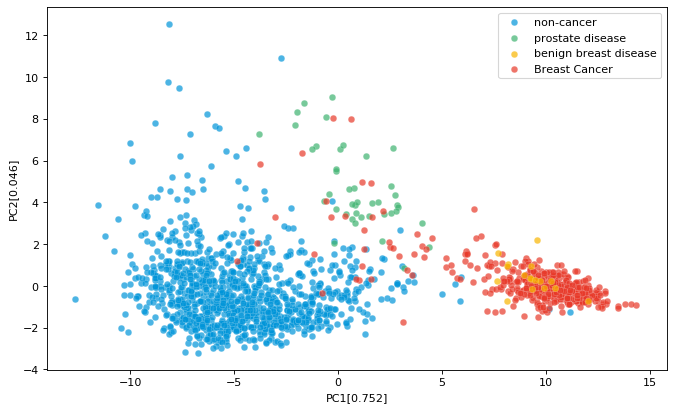

In [10]:
fig = plt.figure(figsize=(10, 6), dpi=80)
_ = plt.scatter(pathway_pca.loc[pathway_pca['Label']=='non-cancer', 'PC1'], pathway_pca.loc[pathway_pca['Label']=='non-cancer', 'PC2'], 
                c='#0095d9', label='non-cancer', alpha=0.7, ec='white', lw=0.2)
_ = plt.scatter(pathway_pca.loc[pathway_pca['Label']=='prostate disease', 'PC1'], pathway_pca.loc[pathway_pca['Label']=='prostate disease', 'PC2'], 
                c='#3eb370', label='prostate disease', alpha=0.7, ec='white', lw=0.2)
_ = plt.scatter(pathway_pca.loc[pathway_pca['Label']=='benign breast disease', 'PC1'], pathway_pca.loc[pathway_pca['Label']=='benign breast disease', 'PC2'], 
                c='#f8b500', label='benign breast disease', alpha=0.7, zorder=9, ec='white', lw=0.2)
_ = plt.scatter(pathway_pca.loc[pathway_pca['Label']=='Breast Cancer', 'PC1'], pathway_pca.loc[pathway_pca['Label']=='Breast Cancer', 'PC2'], 
                c='#e83929', label='Breast Cancer', alpha=0.7, ec='white', lw=0.2)
_ = plt.xlabel('PC1[0.752]')
_ = plt.ylabel('PC2[0.046]')
_ = plt.legend()
fig.savefig('20220610_Results/9. DifferentDiseasePathway_PCA.pdf', dpi=300)

array([0.64544207, 0.05701318], dtype=float32)

,PC1,PC2
GSM1878567,-9.500744,1.903065
GSM1877697,-9.146406,0.935962


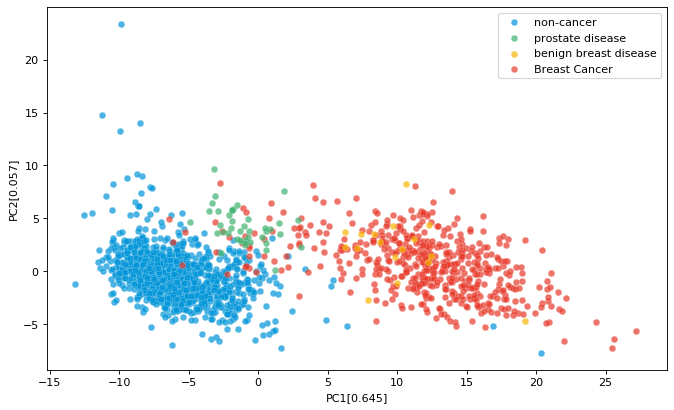

In [11]:
pca = PCA(n_components=2)
module_pca = pd.DataFrame(pca.fit_transform(module_exp), index=module_exp.index, columns=['PC1', 'PC2'])
pca.explained_variance_ratio_
module_pca.head(2)
module_pca['Label'] = preds.loc[module_pca.index, 'Label']

fig = plt.figure(figsize=(10, 6), dpi=80)
_ = plt.scatter(module_pca.loc[module_pca['Label']=='non-cancer', 'PC1'], module_pca.loc[module_pca['Label']=='non-cancer', 'PC2'], 
                c='#0095d9', label='non-cancer', alpha=0.7, ec='white', lw=0.2)
_ = plt.scatter(module_pca.loc[module_pca['Label']=='prostate disease', 'PC1'], module_pca.loc[module_pca['Label']=='prostate disease', 'PC2'], 
                c='#3eb370', label='prostate disease', alpha=0.7, ec='white', lw=0.2, zorder=9)
_ = plt.scatter(module_pca.loc[module_pca['Label']=='benign breast disease', 'PC1'], module_pca.loc[module_pca['Label']=='benign breast disease', 'PC2'], 
                c='#f8b500', label='benign breast disease', alpha=0.7, ec='white', lw=0.2, zorder=9)
_ = plt.scatter(module_pca.loc[module_pca['Label']=='Breast Cancer', 'PC1'], module_pca.loc[module_pca['Label']=='Breast Cancer', 'PC2'], 
                c='#e83929', label='Breast Cancer', alpha=0.7, ec='white', lw=0.2)
_ = plt.xlabel('PC1[0.645]')
_ = plt.ylabel('PC2[0.057]')
_ = plt.legend()
fig.savefig('20220610_Results/9. DifferentDiseaseModule_PCA.pdf', dpi=300)

array([0.5107546 , 0.09248287], dtype=float32)

,PC1,PC2
GSM1878567,-77.516014,17.496874
GSM1877697,-70.415413,-4.982442


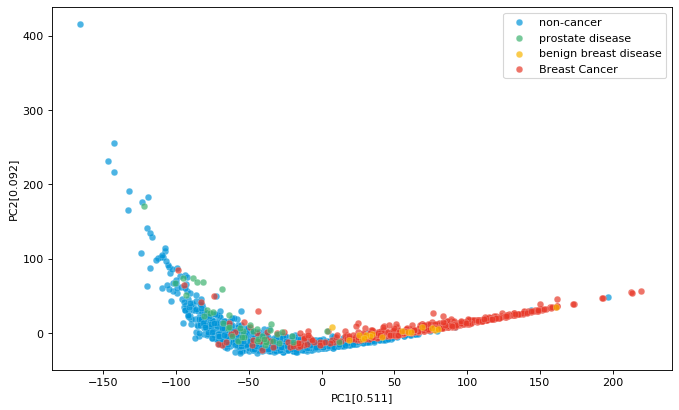

In [12]:
pca = PCA(n_components=2)
gene_pca = pd.DataFrame(pca.fit_transform(gene_exp), index=gene_exp.index, columns=['PC1', 'PC2'])
pca.explained_variance_ratio_
gene_pca.head(2)
gene_pca['Label'] = preds.loc[gene_pca.index, 'Label']

fig = plt.figure(figsize=(10, 6), dpi=80)
_ = plt.scatter(gene_pca.loc[gene_pca['Label']=='non-cancer', 'PC1'], gene_pca.loc[gene_pca['Label']=='non-cancer', 'PC2'], 
                c='#0095d9', label='non-cancer', alpha=0.7, ec='white', lw=0.2)
_ = plt.scatter(gene_pca.loc[gene_pca['Label']=='prostate disease', 'PC1'], gene_pca.loc[gene_pca['Label']=='prostate disease', 'PC2'], 
                c='#3eb370', label='prostate disease', alpha=0.7, ec='white', lw=0.2, zorder=9)
_ = plt.scatter(gene_pca.loc[gene_pca['Label']=='benign breast disease', 'PC1'], gene_pca.loc[gene_pca['Label']=='benign breast disease', 'PC2'], 
                c='#f8b500', label='benign breast disease', alpha=0.7, ec='white', lw=0.2, zorder=9)
_ = plt.scatter(gene_pca.loc[gene_pca['Label']=='Breast Cancer', 'PC1'], gene_pca.loc[gene_pca['Label']=='Breast Cancer', 'PC2'], 
                c='#e83929', label='Breast Cancer', alpha=0.7, ec='white', lw=0.2)
_ = plt.xlabel('PC1[0.511]')
_ = plt.ylabel('PC2[0.092]')
_ = plt.legend()
fig.savefig('20220610_Results/9. DifferentDiseaseGene_PCA.pdf', dpi=300)

array([0.84805753, 0.01929538])

,PC1,PC2
GSM1878567,-77.12261,13.959616
GSM1877697,-69.94754,5.834069


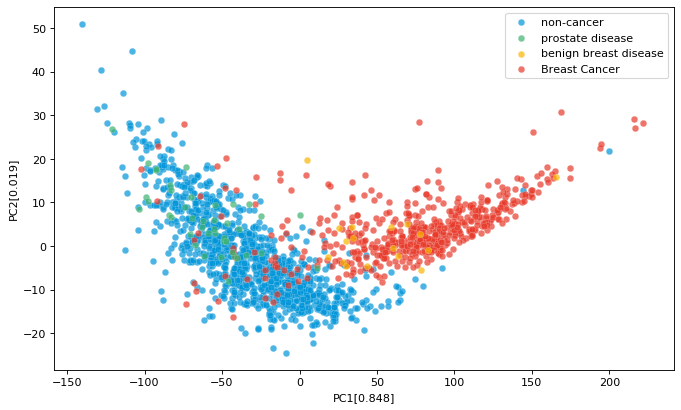

In [13]:
pca = PCA(n_components=2)
micro_pca = pd.DataFrame(pca.fit_transform(data.iloc[:, :-1]), index=data.index, columns=['PC1', 'PC2'])
pca.explained_variance_ratio_
micro_pca.head(2)
micro_pca['Label'] = preds.loc[micro_pca.index, 'Label']

fig = plt.figure(figsize=(10, 6), dpi=80)
_ = plt.scatter(micro_pca.loc[micro_pca['Label']=='non-cancer', 'PC1'], micro_pca.loc[micro_pca['Label']=='non-cancer', 'PC2'], 
                c='#0095d9', label='non-cancer', alpha=0.7, ec='white', lw=0.2)
_ = plt.scatter(micro_pca.loc[micro_pca['Label']=='prostate disease', 'PC1'], micro_pca.loc[micro_pca['Label']=='prostate disease', 'PC2'], 
                c='#3eb370', label='prostate disease', alpha=0.7, ec='white', lw=0.2, zorder=9)
_ = plt.scatter(micro_pca.loc[micro_pca['Label']=='benign breast disease', 'PC1'], micro_pca.loc[micro_pca['Label']=='benign breast disease', 'PC2'], 
                c='#f8b500', label='benign breast disease', alpha=0.7, ec='white', lw=0.2, zorder=9)
_ = plt.scatter(micro_pca.loc[micro_pca['Label']=='Breast Cancer', 'PC1'], micro_pca.loc[micro_pca['Label']=='Breast Cancer', 'PC2'], 
                c='#e83929', label='Breast Cancer', alpha=0.7, ec='white', lw=0.2)
_ = plt.xlabel('PC1[0.848]')
_ = plt.ylabel('PC2[0.019]')
_ = plt.legend()
fig.savefig('20220610_Results/9. DifferentDiseaseMicroRNA_PCA.pdf', dpi=300)